# Beyca Ders

In [298]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [299]:
df = pd.read_excel('7Mayis.xlsx', 
                 parse_dates={'dt' : ['Tarih', 'Saat']}, 
                  index_col='dt')

In [300]:
df.head()

,GIP AOF (TL/MWh),PTF (TL/MWh),GOP İşlem Hacmi (TL),Toplam Uretim (MWh),Yenilenebilir Uretim,Demand,PTF (h-1),GIP (h-1),Pozitif dengesizlik(h-1),Negatif dengesizlik(h-1),...,GIP (h-48),PTF (h-72),GIP (h-72),PTF (h-168),GIP (h-168),HOUR,MONTH,DAY,WEEKDAY,Sistem Yönü (h-1)
dt,,,,,,,,,,,,,,,,,,,,,
2016-08-05 00:00:00,133.11,130.00,1373853.00,26456.00,9730.87,27163.45,139.95,130.97,1103.97,-2298.65,...,139.15,210.00,208.37,135.00,25.94,0,5,8,7,0
2016-08-05 01:00:00,120.60,119.96,1244441.05,25360.39,9517.26,25907.86,130.00,133.11,2055.83,-2052.71,...,126.99,189.98,186.92,100.07,50.07,1,5,8,7,1
2016-08-05 02:00:00,64.98,70.00,729582.00,24396.19,9187.93,24907.11,119.96,120.60,2681.53,-2222.97,...,126.99,149.11,148.61,70.00,20.58,2,5,8,7,1
2016-08-05 03:00:00,10.00,0.86,51867.14,23842.12,8849.38,23996.10,70.00,64.98,3308.60,-2351.22,...,10.00,120.78,120.53,0.35,14.00,3,5,8,7,1
2016-08-05 04:00:00,10.00,0.94,52679.34,23675.50,8818.16,23807.93,0.86,10.00,2770.42,-1621.79,...,0.00,113.94,113.31,0.82,12.13,4,5,8,7,1


In [301]:
df.isna().sum()

GIP AOF (TL/MWh)            0
PTF (TL/MWh)                0
GOP İşlem Hacmi (TL)        0
Toplam Uretim (MWh)         0
Yenilenebilir Uretim        0
Demand                      0
PTF (h-1)                   0
GIP (h-1)                   0
Pozitif dengesizlik(h-1)    0
Negatif dengesizlik(h-1)    0
PTF (h-2)                   0
GIP (h-2)                   0
Pozitif dengesizlik(h-2)    0
Negatif dengesizlik(h-2)    0
PTF (h-3)                   0
GIP (h-3)                   0
Pozitif dengesizlik(h-3)    0
Negatif dengesizlik(h-3)    0
PTF (h-8)                   0
GIP (h-8)                   0
Pozitif dengesizlik(h-8)    0
Negatif dengesizlik(h-8)    0
PTF (h-24)                  0
GIP (h-24)                  0
PTF (h-48)                  0
GIP (h-48)                  0
PTF (h-72)                  0
GIP (h-72)                  0
PTF (h-168)                 0
GIP (h-168)                 0
HOUR                        0
MONTH                       0
DAY                         0
WEEKDAY   

In [302]:
df = df[['PTF (TL/MWh)', 'PTF (h-1)', 'GIP (h-1)', 'PTF (h-2)', 'GIP (h-2)', 'PTF (h-24)',
         'GIP (h-24)', 'PTF (h-168)', 'GIP (h-168)']]

In [303]:
df.head()

,PTF (TL/MWh),PTF (h-1),GIP (h-1),PTF (h-2),GIP (h-2),PTF (h-24),GIP (h-24),PTF (h-168),GIP (h-168)
dt,,,,,,,,,
2016-08-05 00:00:00,130.00,139.95,130.97,149.98,147.40,139.96,138.33,135.00,25.94
2016-08-05 01:00:00,119.96,130.00,133.11,139.95,130.97,139.95,139.71,100.07,50.07
2016-08-05 02:00:00,70.00,119.96,120.60,130.00,133.11,128.00,129.23,70.00,20.58
2016-08-05 03:00:00,0.86,70.00,64.98,119.96,120.60,5.09,5.10,0.35,14.00
2016-08-05 04:00:00,0.94,0.86,10.00,70.00,64.98,5.10,5.10,0.82,12.13


In [304]:
#datayi hazirlamadan once bir train ve test diye ayiralim.
n = len(df)
train_df = df[:int(0.8*n)]
test_df = df[int(0.8*n):]
print(train_df.shape)
print(test_df.shape)

#simdi datayi normalize etmemiz lazim (butun deep learning modelleri icin bunu unutmamaliyiz)
#train datasi uzerinden normalize edecegiz.
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

(34924, 9)
(8732, 9)


In [305]:
#offset kac adim sonrasini tahmin etmek istedigimizle alakalidir.
#period kac tane datayi tahmin edecegimizle alakalidir.
#period offsetten buyuk olamaz.
#target_col = 1 yani 1.sutunu tahmin ediyoruz 0'i degil.
def make_data(data,lag = 72, offset = 2, period = 1, target_col = 0):
    X = []
    y = []
    for i in range(len(data) - lag - offset):
        X.append(data[i:i+lag,:])
        y.append(data[i+lag + offset - 1,target_col])

    return np.array(X), np.array(y)

In [306]:
lag = 72 #3 saat oncesine bakip sicakligi tahmin ediyor
offset = 2 #1 saat sonrasini tahmin ediyor.
period = 1
target_col = 1
n_features = train_df.shape[1]
#train_df.values dersek sade bir numpy arrayi olarak alir.
X_train, y_train = make_data(train_df.values, lag = lag, offset = offset, period = period,target_col = target_col)
X_test, y_test = make_data(test_df.values, lag = lag, offset = offset, period = period,target_col = target_col)
print(X_train.shape) #56k sample var her bir satirda 3 adim geriye bakmisim, 2 tane de featureimiz var.
print(X_train[:2])
print(y_train[:2])

(34850, 72, 9)
[[[-0.96271066 -0.84434829 -0.93448682 ... -0.84433388 -0.89652457
   -2.20539606]
  [-1.08209345 -0.96266197 -0.90845075 ... -0.82754695 -1.31187866
   -1.91188206]
  [-1.67615362 -1.08204583 -1.06065223 ... -0.95503025 -1.66944228
   -2.27059436]
  ...
  [-0.48731984 -0.25016391 -0.30110481 ... -0.42721535 -0.37878861
   -0.3449333 ]
  [-0.85581312 -0.4872669  -0.51219159 ... -0.47854927 -1.02780167
   -0.98499574]
  [-0.880308   -0.85576348 -0.88399632 ... -0.59180017 -1.16823487
   -1.10699928]]

 [[-1.08209345 -0.96266197 -0.90845075 ... -0.82754695 -1.31187866
   -1.91188206]
  [-1.67615362 -1.08204583 -1.06065223 ... -0.95503025 -1.66944228
   -2.27059436]
  [-2.49827772 -1.67611131 -1.73734658 ... -2.46500174 -2.49765333
   -2.35063258]
  ...
  [-0.85581312 -0.4872669  -0.51219159 ... -0.47854927 -1.02780167
   -0.98499574]
  [-0.880308   -0.85576348 -0.88399632 ... -0.59180017 -1.16823487
   -1.10699928]
  [-0.65628691 -0.88025858 -0.89445941 ... -0.84250921 -0.

# LSTM

In [307]:
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (34850, 72, 9)
y_train.shape: (34850,)
X_test.shape: (8658, 72, 9)
y_test.shape:  (8658,)


In [308]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(64,input_shape = (lag, n_features)))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'relu'))
model.add(tf.keras.layers.Dense(period)) #activation linear olsun

In [309]:
model.compile(optimizer = 'adam',loss = 'mae', metrics = ['mae'])
history = model.fit(X_train,y_train, epochs = 1,  validation_data=(X_test, y_test))

1090/1090 [==============================] - 39s 36ms/step - loss: 0.2930 - mae: 0.2930 - val_loss: 0.2139 - val_mae: 0.2139


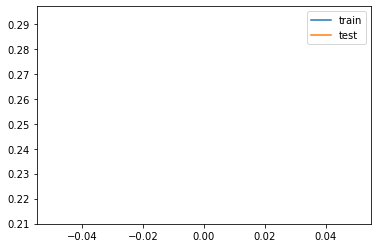

In [310]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

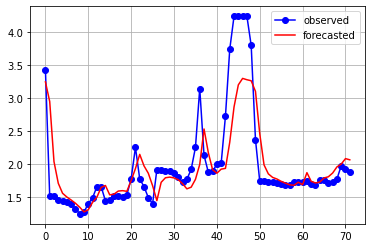

In [311]:
ypred = model.predict(X_test)

plt.plot(y_test[-72:], '-ob', label =  'observed')
plt.plot(ypred[-72:], '-r', label = 'forecasted')
plt.grid()
plt.legend()

In [312]:
ypred.shape

(8658, 1)

In [313]:
ypred_old = (ypred * train_std[1]) + train_mean[1]

In [314]:
y_test_old = (y_test*train_std[1]) + train_mean[1]

In [315]:
ypred_old

array([[302.99304],
       [250.75722],
       [209.87372],
       ...,
       [378.84192],
       [385.7566 ],
       [384.24713]], dtype=float32)

In [316]:
y_test_old

array([250.01, 220.  , 167.4 , ..., 376.71, 372.17, 369.02])

In [317]:
from sklearn.metrics import mean_absolute_error as mae

In [318]:
mae(ypred_old,y_test_old)

17.986569237588984

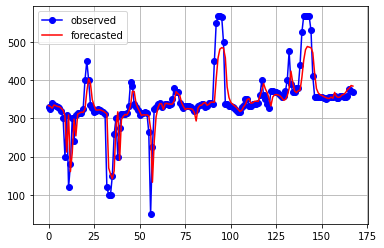

In [319]:
ypred = model.predict(X_test)

plt.plot(y_test_old[-168:], '-ob', label =  'observed')
plt.plot(ypred_old[-168:], '-r', label = 'forecasted')
plt.grid()
plt.legend()